In [1]:
#Import libraries
import numpy as np
import pandas as pd 

#Call the data set to be used
data = pd.read_csv('spam.csv',encoding='latin-1')

data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":'label', "v2":'text'})
print(data.head())
tags = data["label"]
texts = data["text"]

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [2]:
#Check info about the dataset
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [3]:
#Check length of each text
data['length'] = texts.apply(len)
data

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [4]:
#Check for NaN values
data.isnull().sum()

label     0
text      0
length    0
dtype: int64

In [5]:
#Check for duplicated values
data.duplicated().sum()

403

In [6]:
#Removing duplicates as part of data cleaning
data2 = data.drop_duplicates()
data2

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [7]:
#Check the current status of the cleaned data
data2.loc[:, ['label', 'text']].describe()

,label,text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [8]:
#Set labels to binary
label = {'ham': 0, 'spam': 1}
data2['label'].replace(label, inplace=True)
data2

C:\Users\Bive\AppData\Local\Temp\ipykernel_3360\1688924165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['label'].replace(label, inplace=True)


,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

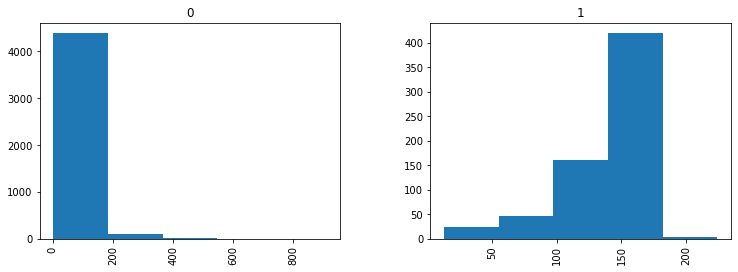

In [44]:
#Understanding the length of text in ham (0) and spam (0) through plotting

data2.hist(column = 'length', by ='label',figsize=(12,4), bins = 5)

In [31]:
#Setting variables to the features
text_clean = data2['text']
label2 = data2['label']
text2 = data2['text']

In [32]:
#Split the labels and text to train and test datas
training_size = int(len(text_clean) * 0.8)

train_text = text2[0:training_size]
test_text = text2[training_size:]
train_label = label2[0:training_size]
test_label = label2[training_size:]

In [33]:
#Conversion of data to arrays
final_train_label = np.array(train_label)
final_test_label = np.array(test_label)

In [34]:
#Using Tokenizer for the text dataset
import tensorflow as tf  
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_text)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_text)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [204]:
# Choosing an algorithm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [205]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [206]:
#Display summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 16)           16000     
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                                                 
 dense_26 (Dense)            (None, 8)                 12808     
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 28,817
Trainable params: 28,817
Non-trainable params: 0
_________________________________________________________________


In [207]:
#Fitting of model
model.fit(padded, final_train_label, epochs=10, validation_data=(testing_padded, final_test_label))

Epoch 1/10
130/130 [==============================] - 2s 7ms/step - loss: 0.3304 - accuracy: 0.8687 - val_loss: 0.1723 - val_accuracy: 0.8868
Epoch 2/10
130/130 [==============================] - 1s 5ms/step - loss: 0.1651 - accuracy: 0.9248 - val_loss: 0.1317 - val_accuracy: 0.9768
Epoch 3/10
130/130 [==============================] - 1s 5ms/step - loss: 0.1328 - accuracy: 0.9729 - val_loss: 0.1169 - val_accuracy: 0.9807
Epoch 4/10
130/130 [==============================] - 1s 5ms/step - loss: 0.0956 - accuracy: 0.9828 - val_loss: 0.0548 - val_accuracy: 0.9855
Epoch 5/10
130/130 [==============================] - 1s 5ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0501 - val_accuracy: 0.9855
Epoch 6/10
130/130 [==============================] - 1s 5ms/step - loss: 0.0281 - accuracy: 0.9901 - val_loss: 0.0475 - val_accuracy: 0.9836
Epoch 7/10
130/130 [==============================] - 1s 5ms/step - loss: 0.0207 - accuracy: 0.9947 - val_loss: 0.0520 - val_accuracy: 0.9855
Epoch 

In [208]:
#This is the dataset to be used for testing the model for prediction
output = pd.read_csv('output_spam.csv',encoding='latin-1')
output

,ï»¿,text
0,1,Feel Yourself That You Are Always Happy.. Slow...
1,2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,3,Send me yetty's number pls.
3,4,Hey so this sat are we going for the intro pil...
4,5,I got it before the new year cos yetunde said ...
5,6,Hey we can go jazz power yoga hip hop kb and y...
6,7,Hey mate. Spoke to the mag people. Weâ°ÃÃ·re...
7,8,Morning only i can ok.
8,9,Wat time Ã_ finish?
9,10,Shant disturb u anymore... Jia you...


In [209]:
#Fixing the feature names of the matrix
output = output.rename(columns={'ï»¿': 'labels'})
output

,labels,text
0,1,Feel Yourself That You Are Always Happy.. Slow...
1,2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,3,Send me yetty's number pls.
3,4,Hey so this sat are we going for the intro pil...
4,5,I got it before the new year cos yetunde said ...
5,6,Hey we can go jazz power yoga hip hop kb and y...
6,7,Hey mate. Spoke to the mag people. Weâ°ÃÃ·re...
7,8,Morning only i can ok.
8,9,Wat time Ã_ finish?
9,10,Shant disturb u anymore... Jia you...


In [210]:
#Convert testing dataset through tokenizer
text_predict = output['text'].astype(str)
text_predict

0     Feel Yourself That You Are Always Happy.. Slow...
1     staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2                           Send me yetty's number pls.
3     Hey so this sat are we going for the intro pil...
4     I got it before the new year cos yetunde said ...
5     Hey we can go jazz power yoga hip hop kb and y...
6     Hey mate. Spoke to the mag people. Weâ°ÃÃ·re...
7                                Morning only i can ok.
8                                  Wat time Ã_ finish?
9                 Shant disturb u anymore... Jia you...
10    4mths half price Orange line rental & latest c...
11    Your opinion about me? 1. Over 2. Jada 3. Kusr...
12    MOON has come to color your dreams, STARS to m...
13    You are a winner U have been specially selecte...
14    Unless it's a situation where YOU GO GURL woul...
15    Awww dat is sweet! We can think of something t...
16                              Bring tat cd don forget
17    Single line with a big meaning::::: \Miss 

In [211]:
#Convert testing dataset through tokenizer
padding_type='post'
seq_pred = tokenizer.texts_to_sequences(text_predict)
seq_pad = pad_sequences(seq_pred, padding=padding_type, maxlen=max_length)  

In [202]:
#Perform Prediction
result = model.predict(seq_pad)

1/1 [==============================] - 0s 139ms/step


In [212]:
#Display Results
result

array([[8.0716098e-05],
       [4.1684721e-02],
       [3.5326974e-03],
       [2.7496533e-03],
       [4.3008472e-06],
       [3.4215299e-03],
       [1.7253656e-03],
       [2.0541273e-04],
       [1.2015166e-03],
       [4.2142393e-03],
       [6.3962555e-01],
       [2.3138162e-01],
       [1.6327081e-02],
       [6.3962555e-01],
       [5.7944530e-03],
       [6.1259789e-06],
       [3.2561773e-03],
       [1.1118192e-03],
       [4.7184858e-03],
       [1.4062728e-04]], dtype=float32)

In [213]:
# values greater than 0.45 means that the text is spam
# lower than 0.45 would tell that it is not spam

In [214]:
x=0
while x < 20:
    if result[x] < 0.45:
        print('ham')
        x_result = 'ham'
        #new_pred.iloc[x, 0] = 'ham'
        x += 1
    else:
        print('spam')
        x_result = 'spam'
        #new_pred.iloc[x, 0] = 'ham'
        x += 1

ham
ham
ham
ham
ham
ham
ham
ham
ham
ham
spam
ham
ham
spam
ham
ham
ham
ham
ham
ham


In [215]:
#Import the results to the csv file
import csv
with open('output_spam.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    with open('bive_output_spam.csv', 'w', encoding="utf-8") as new_file:
        field_name = ['text', 'label']
        
        csv_writer = csv.DictWriter(new_file, fieldnames=field_name, delimiter=',')
        
        x=0
        
        while x < 20:
            if result[x] < 0.45:
                x_result = 'ham'
                csv_writer.writeheader()
                csv_writer.writerow({'text': output.iloc[x,1], 'label': x_result})
                x += 1
            else:
                x_result = 'spam'
                csv_writer.writeheader()
                csv_writer.writerow({'text': output.iloc[x,1], 'label': x_result})
                x += 1

In [216]:
#Check the final output
final_file = pd.read_csv('bive_output_spam.csv')
final_file

,text,label
0,Feel Yourself That You Are Always Happy.. Slow...,ham
1,text,label
2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323,ham
3,text,label
4,Send me yetty's number pls.,ham
5,text,label
6,Hey so this sat are we going for the intro pil...,ham
7,text,label
8,I got it before the new year cos yetunde said ...,ham
9,text,label


In [217]:
#Remove duplications
final_file.duplicated()

0     False
1     False
2     False
3      True
4     False
5      True
6     False
7      True
8     False
9      True
10    False
11     True
12    False
13     True
14    False
15     True
16    False
17     True
18    False
19     True
20    False
21     True
22    False
23     True
24    False
25     True
26    False
27     True
28    False
29     True
30    False
31     True
32    False
33     True
34    False
35     True
36    False
37     True
38    False
dtype: bool

In [218]:
#Remove duplications
final_file = final_file.drop_duplicates()
final_file

,text,label
0,Feel Yourself That You Are Always Happy.. Slow...,ham
1,text,label
2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323,ham
4,Send me yetty's number pls.,ham
6,Hey so this sat are we going for the intro pil...,ham
8,I got it before the new year cos yetunde said ...,ham
10,Hey we can go jazz power yoga hip hop kb and y...,ham
12,Hey mate. Spoke to the mag people. Weâ°ÃÃ·re...,ham
14,Morning only i can ok.,ham
16,Wat time Ã_ finish?,ham


In [219]:
#Final cleaning of the final output
final_file = final_file.drop(1)
final_file

,text,label
0,Feel Yourself That You Are Always Happy.. Slow...,ham
2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323,ham
4,Send me yetty's number pls.,ham
6,Hey so this sat are we going for the intro pil...,ham
8,I got it before the new year cos yetunde said ...,ham
10,Hey we can go jazz power yoga hip hop kb and y...,ham
12,Hey mate. Spoke to the mag people. Weâ°ÃÃ·re...,ham
14,Morning only i can ok.,ham
16,Wat time Ã_ finish?,ham
18,Shant disturb u anymore... Jia you...,ham


In [221]:
#Finally, producing the csv file of the predicted output
final_file.to_csv("bive_output_spam.csv")